# K-Means Clustering


### 1) Import Data

In [19]:
#!wget https://dataset-ppm.s3.amazonaws.com/iris.csv
# https://drive.google.com/file/d/1uL6vvfO6fYCi3ilpu7-7cmXqmB8qxEtN
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uL6vvfO6fYCi3ilpu7-7cmXqmB8qxEtN' -O iris.csv

--2024-02-06 23:40:43--  https://docs.google.com/uc?export=download&id=1uL6vvfO6fYCi3ilpu7-7cmXqmB8qxEtN
Resolving docs.google.com (docs.google.com)... 172.253.123.138, 172.253.123.100, 172.253.123.113, ...
Connecting to docs.google.com (docs.google.com)|172.253.123.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1uL6vvfO6fYCi3ilpu7-7cmXqmB8qxEtN&export=download [following]
--2024-02-06 23:40:43--  https://drive.usercontent.google.com/download?id=1uL6vvfO6fYCi3ilpu7-7cmXqmB8qxEtN&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.218.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5107 (5.0K) [application/octet-stream]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.99K  --.-KB/s    in 0

In [20]:
import pandas as pd
import numpy as np
data=pd.read_csv('iris.csv')

In [21]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2) Preprocessing

In [22]:
kelas=data.pop('Species')

In [23]:
del data['PetalLengthCm']
del data['PetalWidthCm']

In [24]:
def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return  df_input

In [25]:
data_normal = minmax(data)

In [26]:
data_normal

,Id,SepalLengthCm,SepalWidthCm
0,0.000000,0.222222,3.5
1,0.006711,0.166667,3.0
2,0.013423,0.111111,3.2
3,0.020134,0.083333,3.1
4,0.026846,0.194444,3.6
...,...,...,...
145,0.973154,0.666667,3.0
146,0.979866,0.555556,2.5
147,0.986577,0.611111,3.0
148,0.993289,0.527778,3.4


## 3) Plotting Visualization

[]

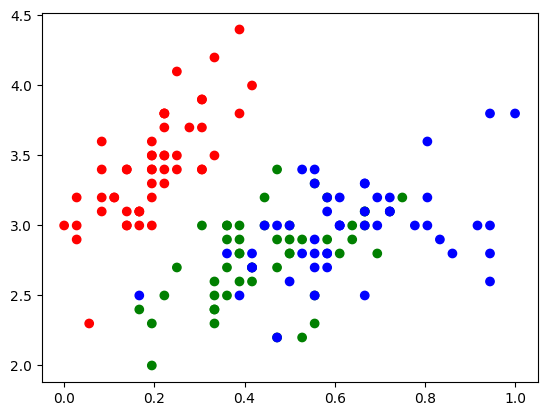

In [27]:
import matplotlib.pyplot as plt
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'}
plt.scatter(data_normal['SepalLengthCm'],data_normal['SepalWidthCm'],c=kelas.map(warna))
plt.plot()

## 4) K-Means Clustering

In [28]:
def euclidean(data1,data2):
  jarak = np.square(data1-data2)
  jarak = np.sum(jarak)
  return np.sqrt(jarak)

In [29]:
from random import randint
import copy
def kmeans(data_input,k,iter_max=200):
  n_data = data_input.shape[0]
  n_fitur = data_input.shape[1]
  iter = 1
  cluster = np.array([randint(0,k-1) for i in range (n_data)])
  centroid = np.zeros((k,n_fitur))
  cluster_tidak_berubah = False
  while cluster_tidak_berubah==False and iter<iter_max:
    jarak = np.zeros((n_data,k))
    for i in range(k):
      centroid[i,:]=data_input.iloc[np.where(cluster==i)[0]].mean().tolist()
    for i in range(n_data):
      for j in range(k):
        jarak[i][j]=euclidean(data_input.iloc[i],centroid[j])
    cluster_baru = [np.argmin(jarak[i]) for i in range(n_data)]
    cluster_tidak_berubah = np.array_equal(cluster_baru,cluster)
    cluster = np.array(copy.deepcopy(cluster_baru))
    iter+=1
  print(jarak)
  print(cluster)
  print(centroid)
  print(cluster_baru)
  return cluster_baru

In [30]:
cluster = kmeans(data_normal,3)

[[0.17834468 1.06256751 0.95517433]
 [0.4678825  0.73574489 0.91323867]
 [0.2984697  0.86531116 0.9335257 ]
 [0.3882327  0.81144005 0.94294596]
 [0.21416704 1.13654213 0.99110988]
 [0.49090922 1.38103478 1.1188331 ]
 [0.1801066  0.99980396 0.96567426]
 [0.1259029  0.9627085  0.89712744]
 [0.57789248 0.72150765 0.98012969]
 [0.35643289 0.75004433 0.86051662]
 [0.2973204  1.18672699 0.96741032]
 [0.12058532 0.96325763 0.90740122]
 [0.45137864 0.68982358 0.87026224]
 [0.49050747 0.7550557  0.95668103]
 [0.60450927 1.44519852 1.12404555]
 [0.98141614 1.8244834  1.45820852]
 [0.47625763 1.35283792 1.0725426 ]
 [0.08272838 1.00342061 0.86748162]
 [0.40808639 1.24968045 0.96695133]
 [0.36444316 1.26412288 1.02376692]
 [0.11122495 0.8935759  0.77139605]
 [0.2637309  1.1680881  0.95244134]
 [0.20413603 1.11133804 0.96874513]
 [0.13946149 0.81694255 0.77063868]
 [0.07740578 0.91921745 0.84361799]
 [0.43815741 0.60373298 0.76868377]
 [0.04055827 0.89662023 0.79993319]
 [0.07738374 0.96756255 0.80

In [31]:
print(cluster)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2]


[]

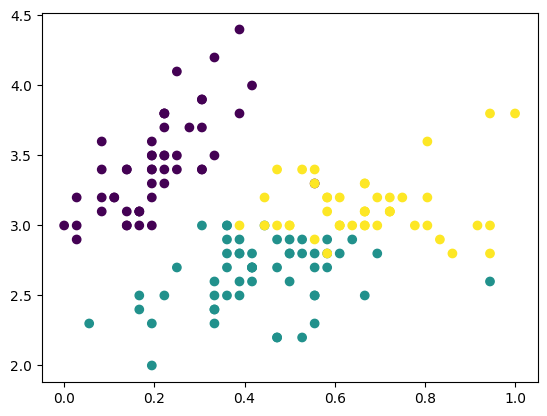

In [32]:
import matplotlib.pyplot as plt
plt.scatter(data_normal['SepalLengthCm'],data_normal['SepalWidthCm'],c=cluster)
plt.plot()

## Testing out which features are the best combination!

[]

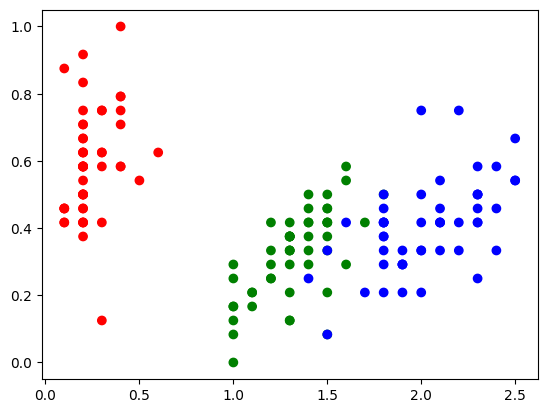

In [33]:
# Petal Width & Sepal Width
import pandas as pd
import numpy as np
data=pd.read_csv('iris.csv')
kelas=data.pop('Species')
del data['PetalLengthCm']
del data['SepalLengthCm']
def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return  df_input
data_normal = minmax(data)
import matplotlib.pyplot as plt
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'}
plt.scatter(data_normal['PetalWidthCm'],data_normal['SepalWidthCm'],c=kelas.map(warna))
plt.plot()

[]

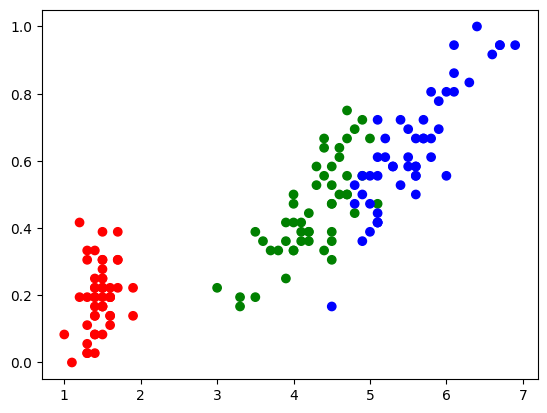

In [34]:
# Petal length & Sepal length
import pandas as pd
import numpy as np
data=pd.read_csv('iris.csv')
kelas=data.pop('Species')
del data['PetalWidthCm']
del data['SepalWidthCm']
def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return  df_input
data_normal = minmax(data)
import matplotlib.pyplot as plt
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'}
plt.scatter(data_normal['PetalLengthCm'],data_normal['SepalLengthCm'],c=kelas.map(warna))
plt.plot()

[]

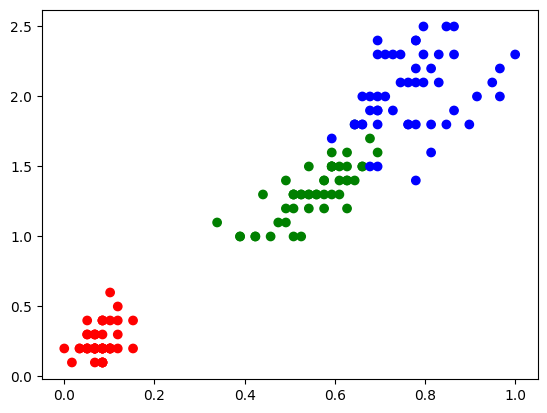

In [35]:
# Petal Width & Petal Length
import pandas as pd
import numpy as np
data=pd.read_csv('iris.csv')
kelas=data.pop('Species')
del data['SepalLengthCm']
del data['SepalWidthCm']
def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return  df_input
data_normal = minmax(data)
import matplotlib.pyplot as plt
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'}
plt.scatter(data_normal['PetalLengthCm'],data_normal['PetalWidthCm'],c=kelas.map(warna))
plt.plot()

[]

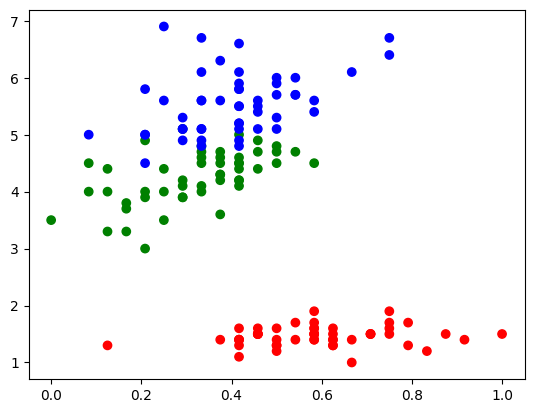

In [36]:
# Sepal Width & Petal length
import pandas as pd
import numpy as np
data=pd.read_csv('iris.csv')
kelas=data.pop('Species')
del data['SepalLengthCm']
del data['PetalWidthCm']
def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return  df_input
data_normal = minmax(data)
import matplotlib.pyplot as plt
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'}
plt.scatter(data_normal['SepalWidthCm'],data_normal['PetalLengthCm'],c=kelas.map(warna))
plt.plot()

[]

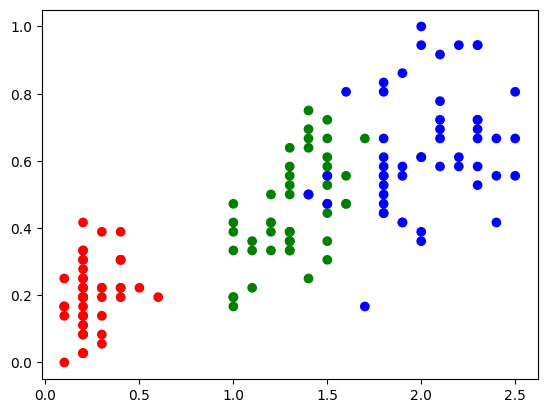

In [37]:
# Petal Width & Sepal length
import pandas as pd
import numpy as np
data=pd.read_csv('iris.csv')
kelas=data.pop('Species')
del data['PetalLengthCm']
del data['SepalWidthCm']
def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return  df_input
data_normal = minmax(data)
import matplotlib.pyplot as plt
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'}
plt.scatter(data_normal['PetalWidthCm'],data_normal['SepalLengthCm'],c=kelas.map(warna))
plt.plot()


1.  petal_length dan petal width
2.  petal_length dan sepal_length
3.  petal_width dan sepal_width

[]

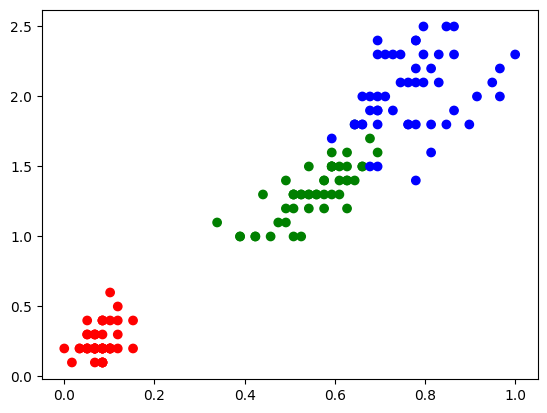

In [42]:
import pandas as pd
import numpy as np
data=pd.read_csv('iris.csv')

kelas=data.pop('Species')
del data['SepalLengthCm']
del data['SepalWidthCm']

def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return  df_input

data_normal = minmax(data)

import matplotlib.pyplot as plt
warna = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'}
plt.scatter(data_normal['PetalLengthCm'],data_normal['PetalWidthCm'],c=kelas.map(warna))
plt.plot()

[]

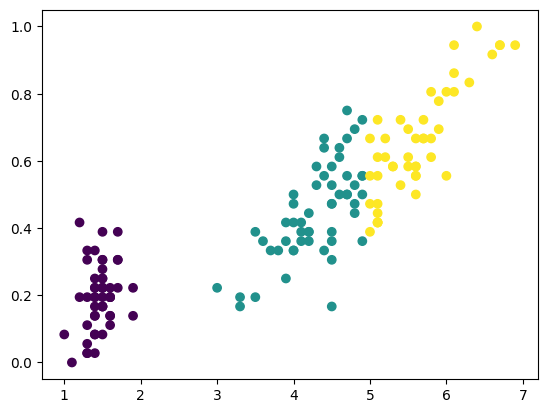

In [44]:
import pandas as pd
import numpy as np

data=pd.read_csv('iris.csv')
kelas=data.pop('Species')

del data['PetalWidthCm']
del data['SepalWidthCm']

def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return  df_input

data_normal = minmax(data)

def euclidean(data1,data2):
  jarak = np.square(data1-data2)
  jarak = np.sum(jarak)
  return np.sqrt(jarak)


from random import randint
import copy

def kmeans(data_input,k,iter_max=200):
  n_data = data_input.shape[0]
  n_fitur = data_input.shape[1]
  iter = 1
  cluster = np.array([randint(0,k-1) for i in range (n_data)])
  centroid = np.zeros((k,n_fitur))
  cluster_tidak_berubah = False
  while cluster_tidak_berubah==False and iter<iter_max:
    jarak = np.zeros((n_data,k))
    for i in range(k):
      centroid[i,:]=data_input.iloc[np.where(cluster==i)[0]].mean().tolist()
    for i in range(n_data):
      for j in range(k):
        jarak[i][j]=euclidean(data_input.iloc[i],centroid[j])
    cluster_baru = [np.argmin(jarak[i]) for i in range(n_data)]
    cluster_tidak_berubah = np.array_equal(cluster_baru,cluster)
    cluster = np.array(copy.deepcopy(cluster_baru))
    iter+=1
  return cluster_baru

cluster = kmeans(data_normal,3)


import matplotlib.pyplot as plt

plt.scatter(data_normal['PetalLengthCm'],data_normal['SepalLengthCm'],c=cluster)
plt.plot()